In [2]:
%reload_ext autoreload
%autoreload 2

import sys
import numpy as np
import h5py

sys.path.append("..")
from dm21cm.utils import load_h5_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file("../matplotlibrc")

In [4]:
abscs = load_h5_dict("../data/abscissas/abscs_230629xc.h5")

In [6]:
tf_dir = "/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/230629xc"
with h5py.File(f"{tf_dir}/phot_dep.h5", 'r') as hf:
    tf = hf['data'][()]
    axes = hf['axes'][()]

In [11]:
abscs['dep_c']

array([b'H ion', b'He ion', b'exc', b'heat', b'cont', b'xray'],
      dtype=object)

In [5]:
from scipy import interpolate

In [9]:
interp = interpolate.RegularGridInterpolator((abscs['rs'], abscs['photE'], abscs['nBs'], abscs['x']), tf)

In [28]:
rs = 10.
nBs = 1.
xs = np.array([1e-4, 1e-3, 1e-2, 1e-1, 0.5, 0.9])
engs = np.linspace(0.5, 10, 100) * 1000 # [eV]
x_grid, eng_grid = np.meshgrid(xs, engs, indexing='ij')
fs = interp((rs, eng_grid, nBs, x_grid))

In [29]:
fs.shape

(6, 100, 6)

In [30]:
fion = fs[...,0] + fs[...,1]
fexc = fs[...,2]
fheat = fs[...,3]
totf  = fion + fexc + fheat
fion /= totf
fexc /= totf
fheat /= totf

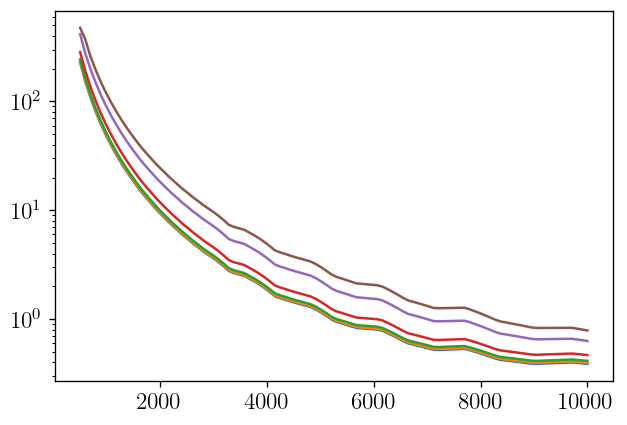

In [31]:
for i in range(6):
    plt.plot(engs, totf[i])
plt.yscale('log')

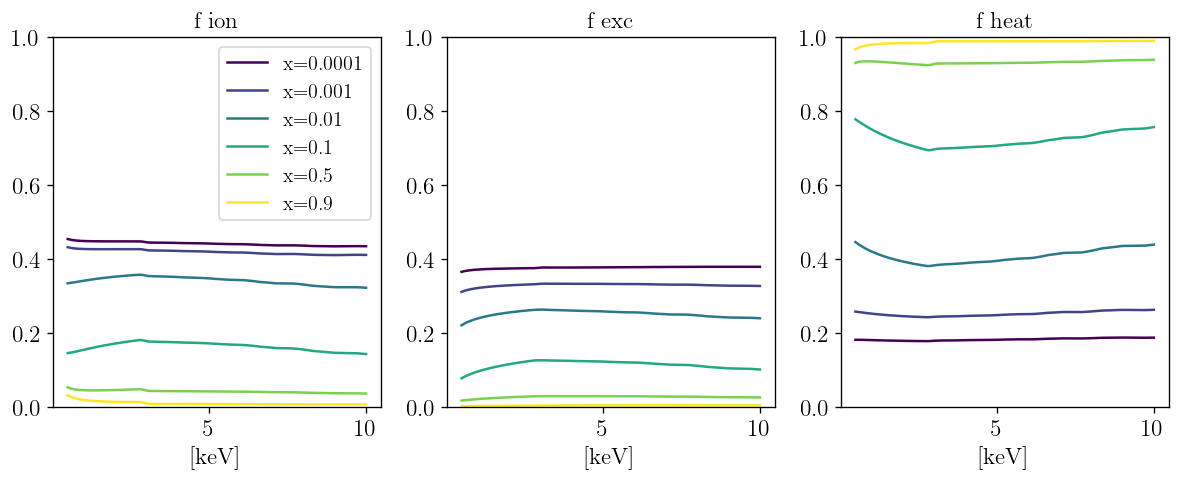

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(6):
    color = cms['viridis'](i/5)
    axs[0].plot(engs/1000, fion[i], label=f'x={xs[i]}', color=color)
    axs[1].plot(engs/1000, fexc[i], label=f'x={xs[i]}', color=color)
    axs[2].plot(engs/1000, fheat[i], label=f'x={xs[i]}', color=color)

axs[0].set(title='f ion', xlabel='[keV]', ylim=(0, 1))
axs[1].set(title='f exc', xlabel='[keV]', ylim=(0, 1))
axs[2].set(title='f heat', xlabel='[keV]', ylim=(0, 1))
axs[0].legend(loc='upper right')